<a href="https://colab.research.google.com/github/Rango-Zhang-Hang/AI6103-DEEP-LEARNING-APPLICATIONS/blob/main/L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls

gdrive	sample_data


In [3]:
!pip install transformers==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 563 kB 13.5 MB/s 
     |████████████████████████████████| 132 kB 72.5 MB/s 
     |████████████████████████████████| 1.3 MB 78.1 MB/s 
     |████████████████████████████████| 5.6 MB 23.5 MB/s 
     |████████████████████████████████| 880 kB 70.4 MB/s 
     |████████████████████████████████| 9.9 MB 58.2 MB/s 
     |████████████████████████████████| 79 kB 9.4 MB/s 
     |████████████████████████████████| 140 kB 95.2 MB/s 
     |████████████████████████████████| 127 kB 60.9 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895259 sha256=6484892d90f8d576889089f9aec051df5d9ed5488c454c92192befd8c86cd64f
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    

In [4]:
!pip install torch==1.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 753.4 MB 7.6 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.4.0 which is incompatible.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.4.0 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.4.0 which is incompatible.
fastai 2.7.10 requires torch<1.14,>=1.7, but you have torch 1.4.0 which is incompatible.


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import io
from transformers import *
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
from sklearn.model_selection import train_test_split
import os, re, csv, math, codecs
from sklearn import model_selection
from sklearn import metrics
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import tensorflow as tf  
import transformers  
from transformers import BertTokenizer

Dataset Preprocessing

In [ ]:
cp "./gdrive/MyDrive/IMDB Dataset.csv" 'IMDB Dataset.csv'

In [6]:
df = pd.read_csv("IMDB Dataset.csv")
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [7]:
#dataset dimensions
df.shape

(50000, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'sentiments')

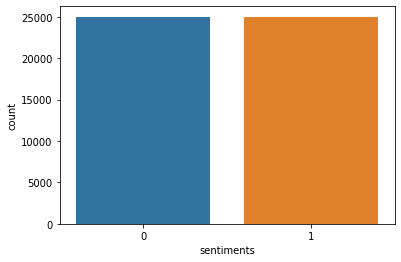

In [8]:
#Labeled reviews barplot
sns.countplot(df.sentiment)
plt.xlabel('sentiments')

# BERT

In [ ]:
cp './gdrive/MyDrive/BERT' 'BERT'

In [9]:
pretrained_model = 'BERT'

In [10]:
tokenizer = BertTokenizer.from_pretrained(pretrained_model)

Example Display

In [11]:

sample_txt = 'Noob the report. Do you want some hanburgurs to go on?.'
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: Noob the report. Do you want some hanburgurs to go on?.
   Tokens: ['no', '##ob', 'the', 'report', '.', 'do', 'you', 'want', 'some', 'ha', '##nburg', '##urs', 'to', 'go', 'on', '?', '.']
Token IDs: [1185, 12809, 1103, 2592, 119, 1202, 1128, 1328, 1199, 5871, 16050, 7719, 1106, 1301, 1113, 136, 119]


  BERT Model Parameters set

In [12]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [13]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([  101,  1185, 12809,  1103,  2592,   119,  1202,  1128,  1328,  1199,
         5871, 16050,  7719,  1106,  1301,  1113,   136,   119,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])

In [14]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

32


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [15]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'no',
 '##ob',
 'the',
 'report',
 '.',
 'do',
 'you',
 'want',
 'some',
 'ha',
 '##nburg',
 '##urs',
 'to',
 'go',
 'on',
 '?',
 '.',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Token count')

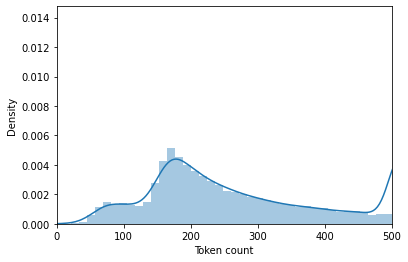

In [16]:
token_lens = []

for txt in df.review:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))
sns.distplot(token_lens)
plt.xlim([0, 500]);
plt.xlabel('Token count')

In [17]:
MAX_LEN = 200    
RANDOM_SEED = 42
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu' )

# Dataset Spliting:
training, validation and testing sets: 18:1:1

In [18]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [19]:
df_train.shape, df_val.shape, df_test.shape

((45000, 2), (2500, 2), (2500, 2))

Dataset

In [20]:
class IMDBDataset(Dataset):

  def __init__(self, reviews, sentiments, tokenizer, max_len):
    self.reviews = reviews
    self.sentiments = sentiments
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    sentiment = self.sentiments[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'sentiments': torch.tensor(sentiment, dtype=torch.long)
    }

In [21]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = IMDBDataset(
    reviews=df.review.to_numpy(),
    sentiments=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [22]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [23]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['review', 'input_ids', 'attention_mask', 'sentiments'])

In [24]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['sentiments'].shape)

torch.Size([16, 200])
torch.Size([16, 200])
torch.Size([16])


# Reviews Classification with BERT 

In [25]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [26]:
class IMDBClassifier(nn.Module):

  def __init__(self, n_classes):
    super(IMDBClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(pretrained_model)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [27]:
model = IMDBClassifier(len(df['sentiment'].unique()))
model = model.to(device)

In [28]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) 
print(attention_mask.shape) 

torch.Size([16, 200])
torch.Size([16, 200])


In [29]:
torch.version

<module 'torch.version' from '/usr/local/lib/python3.7/dist-packages/torch/version.py'>

In [30]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.3315, 0.6685],
        [0.3921, 0.6079],
        [0.4816, 0.5184],
        [0.4473, 0.5527],
        [0.5070, 0.4930],
        [0.5541, 0.4459],
        [0.4825, 0.5175],
        [0.3435, 0.6565],
        [0.2469, 0.7531],
        [0.4049, 0.5951],
        [0.5100, 0.4900],
        [0.4384, 0.5616],
        [0.3908, 0.6092],
        [0.4042, 0.5958],
        [0.3214, 0.6786],
        [0.3360, 0.6640]], grad_fn=<SoftmaxBackward>)

Training

In [31]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
# L2 regression
# optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay = 2e-7, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [32]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    sentiments = d["sentiments"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, sentiments)

    correct_predictions += torch.sum(preds == sentiments)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [33]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      sentiments = d["sentiments"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, sentiments)

      correct_predictions += torch.sum(preds == sentiments)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
train_a = []
train_l = []
val_a = []
val_l = []
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  train_a.append(train_acc)
  train_l.append(train_loss)
  val_a.append(val_acc)
  val_l.append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/4
----------


In [ ]:
plt.plot(train_a, label='train accuracy')
plt.plot(val_a, label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()